# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Reframing Business Problem into Data Problem**

The business goal of identifying key drivers for used car prices can be effectively addressed through a data science approach by framing it as a task to develop a predictive model for used car prices. The objective is to create a regression model where the dependent variable (target) is the "price" at which cars are sold. To predict this target, we'll use the independent variables (features) such as "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "odometer", "title_status", "transmission", "VIN", "drive", "size", "type", "paint_color", and "state". Initially, data preprocessing will be crucial, and involves handling missing values, deploying encoding techniques for categorical variables, and normalizing or scaling numerical data to ensure optimal model performance.

**Model Selection and Evaluation**

For the model selection phase, the choice is among machine learning algorithms tailored for regression tasks. Potential candidates for this purpose include Linear Regression, Decision Trees, Random Forest, or Gradient Boosting Machines. The selected model will be trained on a designated portion of the data and then validated on another segment to assess both its accuracy and ability to generalize.

**Feature Importance and Insight Generation**

Post-training, the analysis phase focuses on determining which car features notably impact the price. By employing techniques such as examining feature coefficients in linear models or utilizing feature importance scores from ensemble methods, we can identify the most influential drivers. This comprehensive approach not only aids in accurate price prediction but also provides strategic insights into the factors predominantly influencing the used car market valuations.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

Python(71045) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
data = pd.read_csv('data/vehicles.csv')

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  

In [5]:
# Get a concise summary of the DataFrame
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  objec

In [6]:
# Describe the dataset to get statistical summary of numerical columns
print("\nStatistical Summary of Numerical Features:")
print(data.describe())


Statistical Summary of Numerical Features:
                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07



Missing values in each column:
region               0
price                0
year              1205
manufacturer         0
model             5277
condition       174104
cylinders       177678
fuel                 0
odometer             0
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


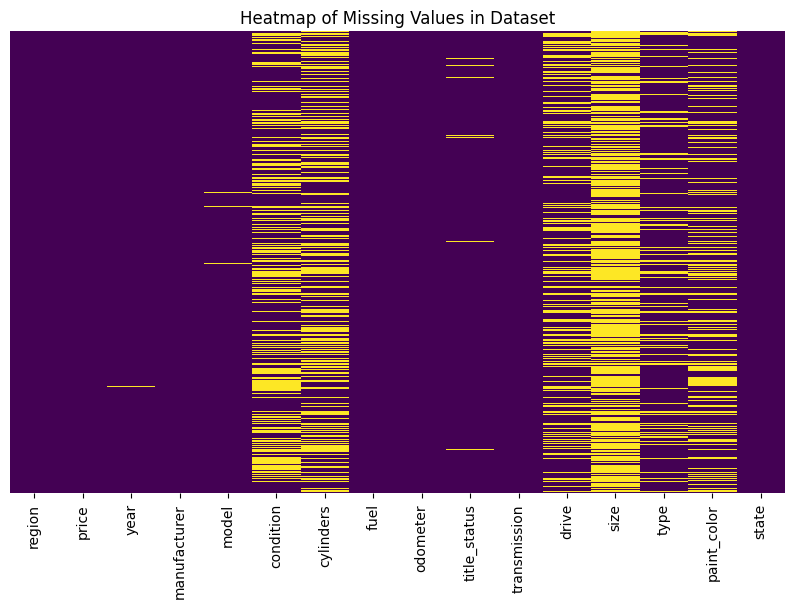

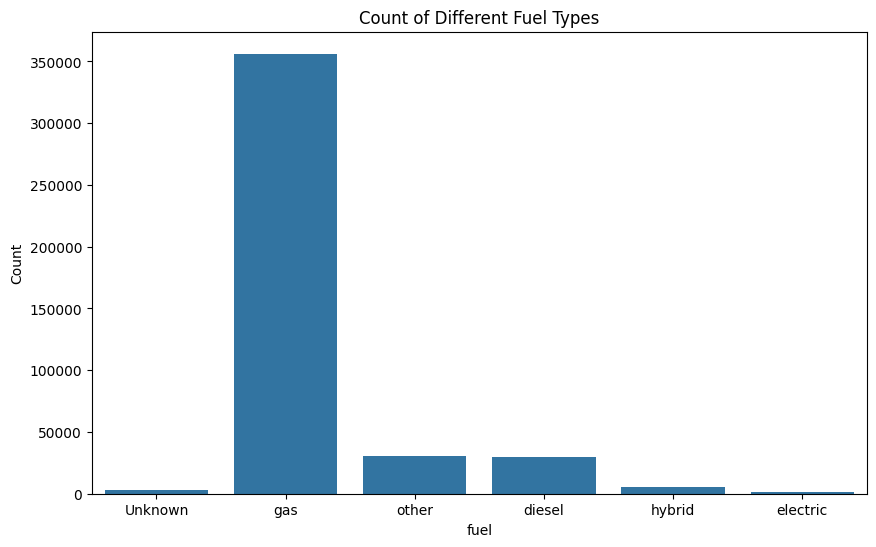

TypeError: 'value' must be an instance of str or bytes, not a float

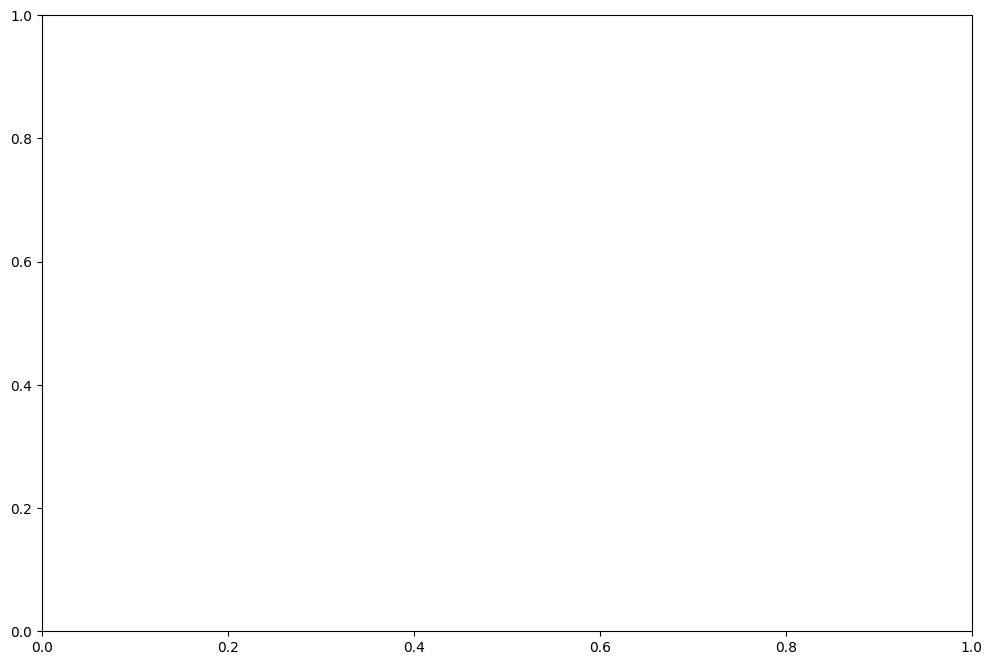

In [ ]:
# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()


# Countplot for a categorical variable (e.g., 'fuel')
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', data=data)
plt.title('Count of Different Fuel Types')
plt.ylabel('Count')
plt.show()



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [22]:
# Drop unneeded columns such as 'id' and 'VIN' as they are likely not useful for modeling
data_copy = data.copy().dropna()
print(data_copy.head())

# Handling Missing Values

data_copy.drop('region', axis=1, inplace=True)
data_copy

    region  price    year manufacturer                 model  condition  \
31  auburn  15000  2013.0         ford             f-150 xlt  excellent   
55  auburn  19900  2004.0         ford       f250 super duty       good   
59  auburn  14000  2012.0        honda               odyssey  excellent   
65  auburn  22500  2001.0         ford                  f450       good   
73  auburn  15000  2017.0        dodge  charger rt 4dr sedan  excellent   

      cylinders    fuel  odometer title_status transmission drive       size  \
31  6 cylinders     gas  128000.0        clean    automatic   rwd  full-size   
55  8 cylinders  diesel   88000.0        clean    automatic   4wd  full-size   
59  6 cylinders     gas   95000.0        clean    automatic   fwd  full-size   
65  8 cylinders  diesel  144700.0        clean       manual   rwd  full-size   
73  8 cylinders     gas   90000.0      rebuilt    automatic   rwd   mid-size   

        type paint_color state  
31     truck       black    al  
55

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
55,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al
59,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al
65,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al
73,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black,wy
426831,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red,wy
426833,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy
426836,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,4wd,full-size,truck,white,wy


In [23]:


#Check on which columns are nulls
data_copy.isnull().sum()



price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

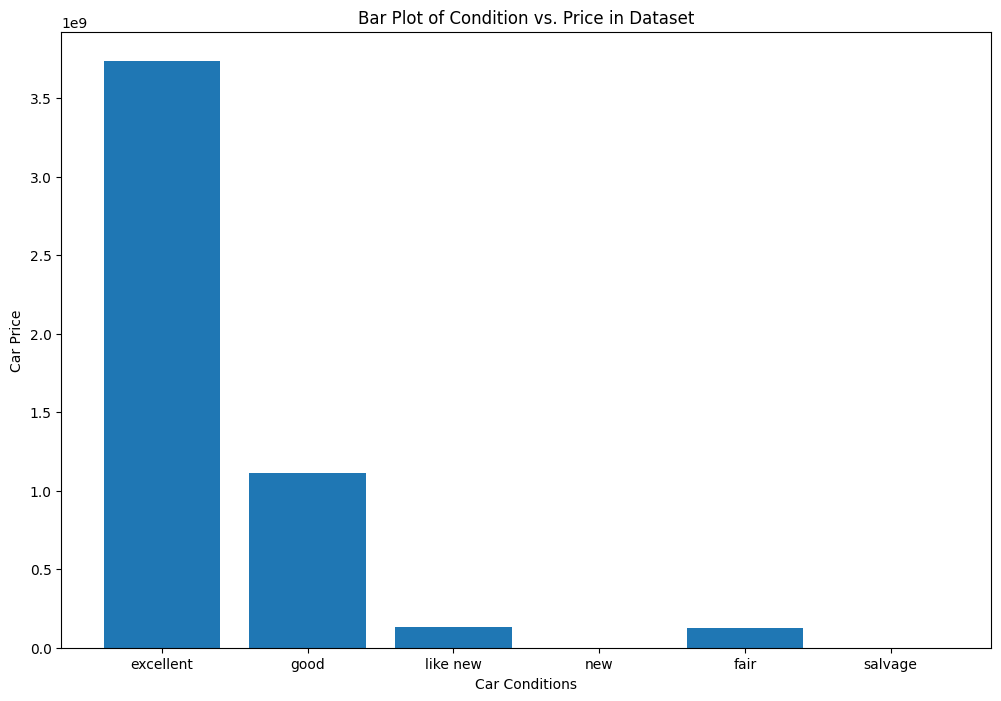

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data_copy["condition"],data_copy["price"])
# set a title and labels
ax.set_title('Bar Plot of Condition vs. Price in Dataset')
ax.set_xlabel('Car Conditions')
ax.set_ylabel('Car Price')
plt.show()

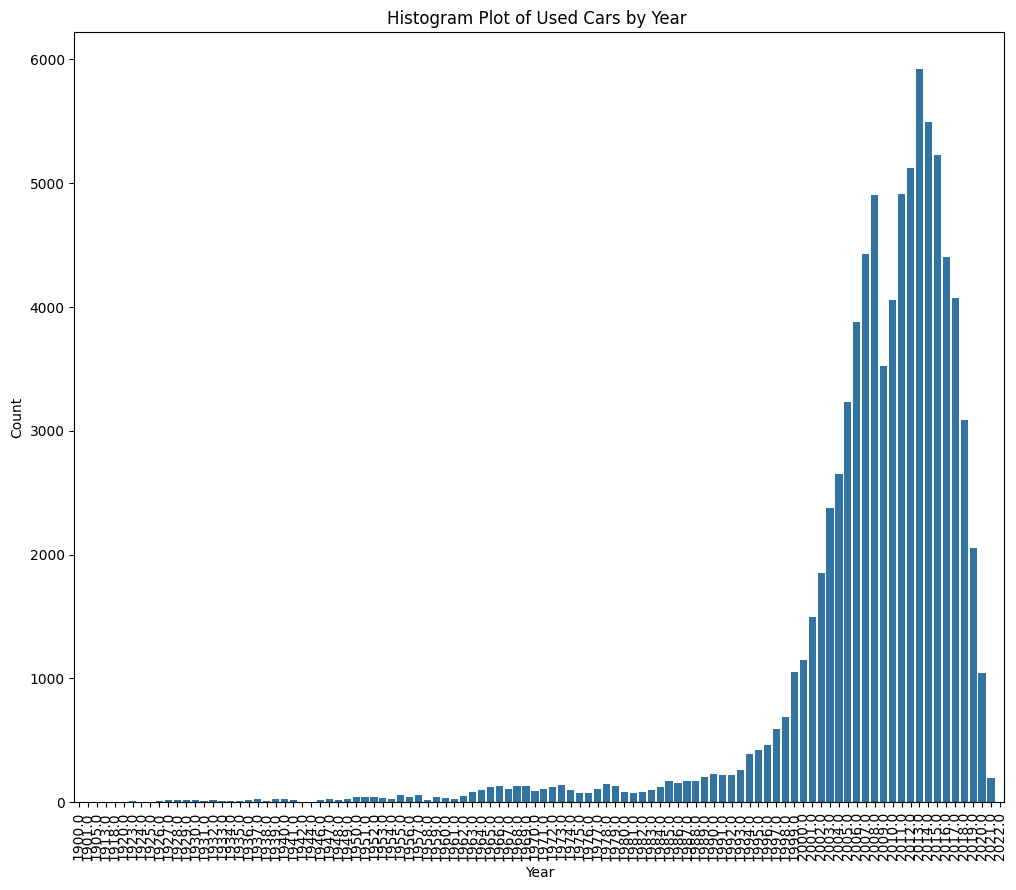

In [25]:
# Plot the number of used car counts by year

fig, ax = plt.subplots(figsize=(12,10))

#create seaborn boxplot
ax = sns.countplot(x='year', data=data_copy , ax=ax)

# Adding Title to the Plot
ax.set_title("Histogram Plot of Used Cars by Year ")

#rotate x-axis and y-axis tick labels
plt.xticks(rotation=90)
    
   
# Setting the X and Y labels
ax.set_xlabel("Year")
ax.set_ylabel("Count")

plt.show()

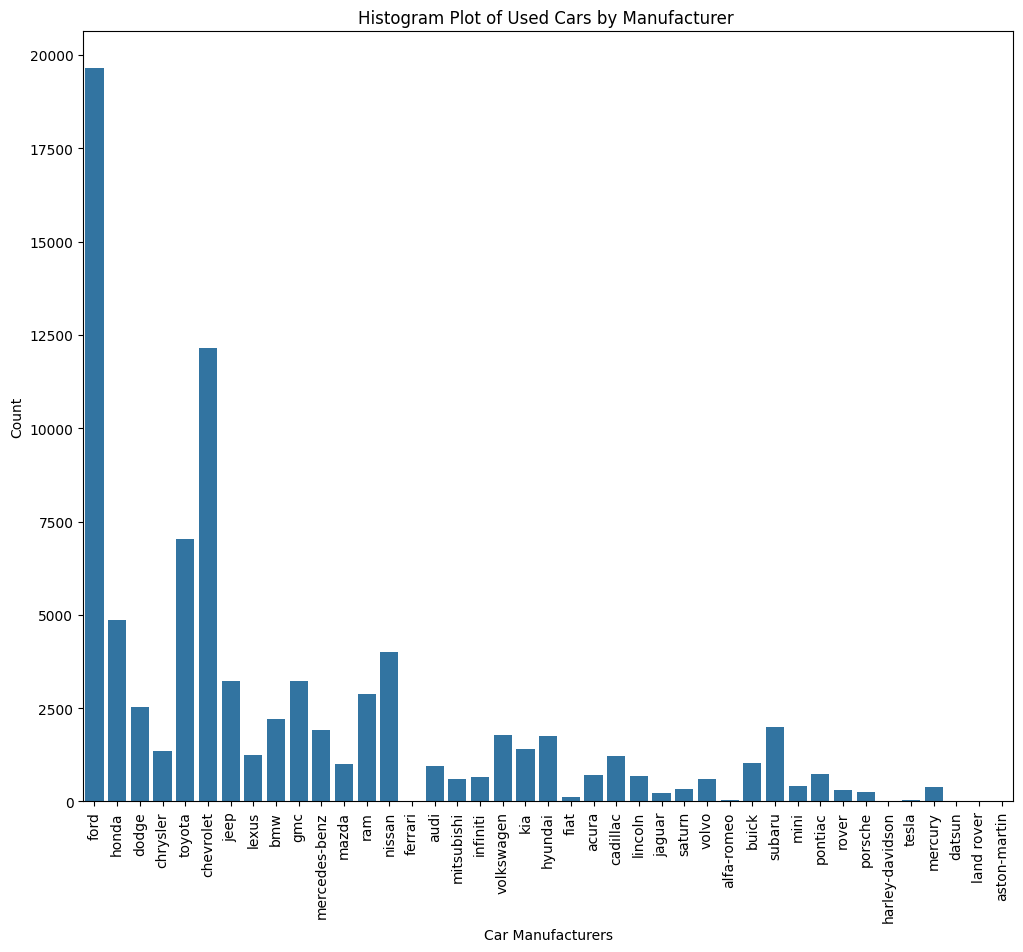

In [26]:
# Plot the number of used car counts by manufacturer

fig, ax = plt.subplots(figsize=(12,10))

#create seaborn boxplot
ax = sns.countplot(x='manufacturer', data=data_copy , ax=ax)

# Adding Title to the Plot
ax.set_title("Histogram Plot of Used Cars by Manufacturer ")

#rotate x-axis and y-axis tick labels
plt.xticks(rotation=90)
    
   
# Setting the X and Y labels
ax.set_xlabel("Car Manufacturers")
ax.set_ylabel("Count")

plt.show()

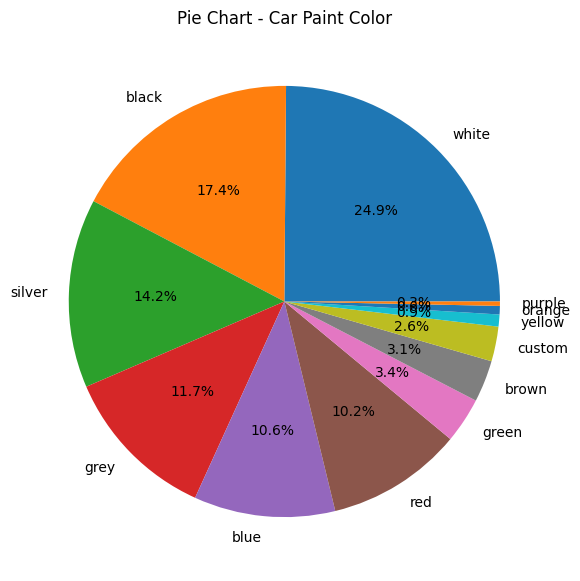

In [30]:
# create a figure with subplots
#fig, ax = plt.subplots(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,7))

# plot each pie chart in a separate subplot

ax.set_title('Pie Chart - Car Paint Color')
s = data_copy['paint_color'].value_counts()
ax.pie(s,labels = s.index,autopct='%1.1f%%')


plt.show()

In [45]:
try:
    data_copy.drop(['state', 'paint_color', 'manufacturer', 'model', 'cylinders', 'type', 'transmission', 'title_status'], axis=1,  inplace=True)
except KeyError:
    print("Columns already dropped")

model_data_df=pd.get_dummies(data_copy, columns=["condition","fuel","size", "drive"])
model_data_df.head()


Columns already dropped


,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,fuel_gas,fuel_hybrid,fuel_other,size_compact,size_full-size,size_mid-size,size_sub-compact,drive_4wd,drive_fwd,drive_rwd
31,15000,2013.0,128000.0,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
55,19900,2004.0,88000.0,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
59,14000,2012.0,95000.0,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
65,22500,2001.0,144700.0,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
73,15000,2017.0,90000.0,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


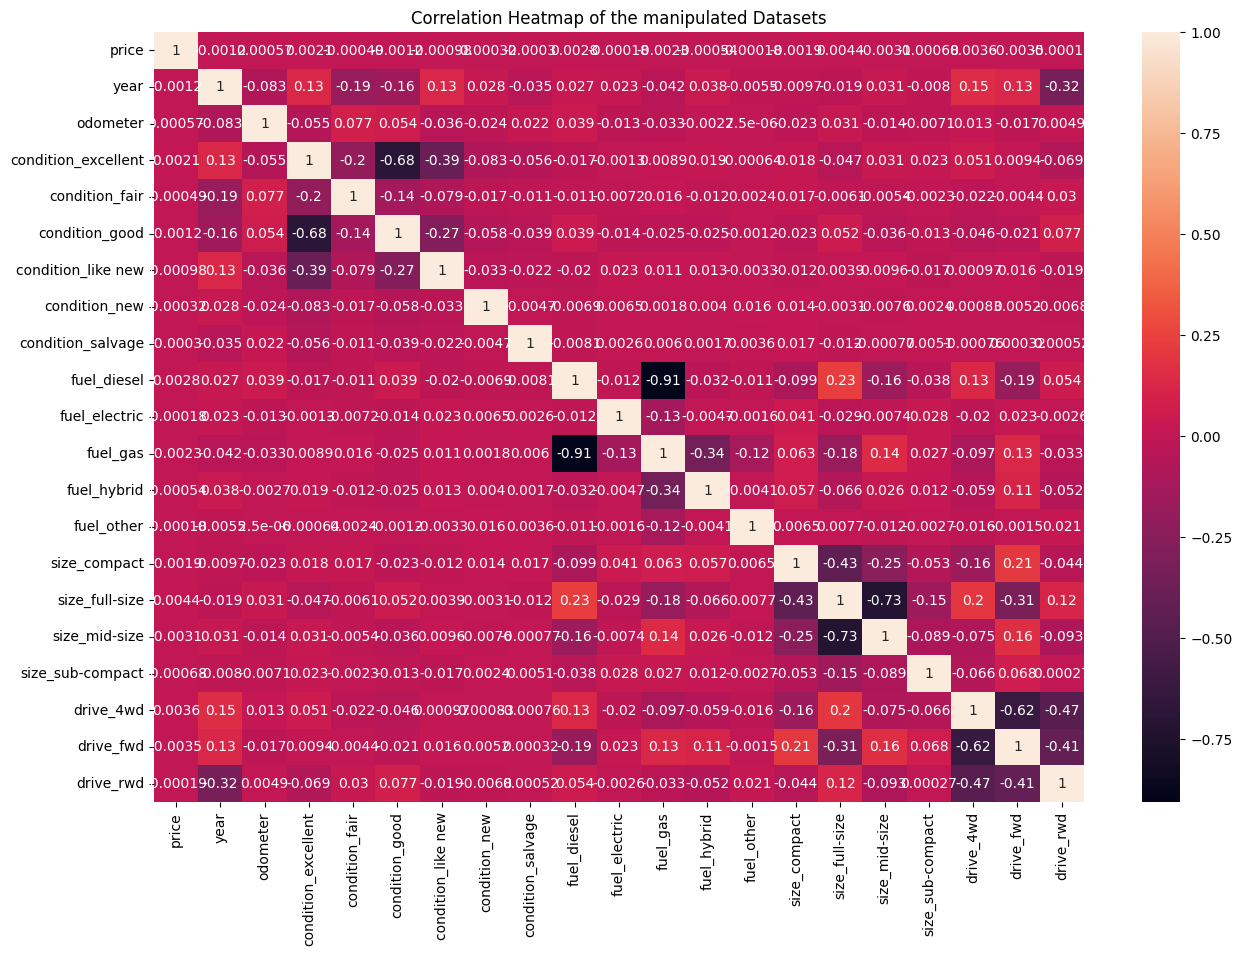

In [47]:
model_data_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(model_data_df.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the manipulated Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

There is a notable correlation between the categorical variables fuel_gas and fuel_diesel, yet these do not show a significant relationship with price. Among the newly engineered categorical features, fuel_diesel exhibits the strongest correlation to price. When analyzing the correlation coefficients related to price, most variables exhibit negative values. The exceptions, which have positive correlations, include year, condition_like new, fuel_diesel, size_full-size, and drive_4wd, with fuel_diesel showing the strongest positive correlation. However, even these positive correlations are not substantial enough to consider removal, as their values do not exceed 0.85.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [48]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict car prices
X = model_data_df.drop(['price'], axis = 1)
y = model_data_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
#First, we create a new model object. Using fit intercept = false sets the y-intercept to 0.
model=LinearRegression(fit_intercept=False)

In [50]:
# With model created, let's fit the model using the manipulated datasets
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [51]:


# Fitted model can now be used to examine the estimated coefficients and also predict ths value of the dependent
# for a given set of independent variables which in this model is the manipulated dataset
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)



Coefficient of the model:  [-1.01106230e+03 -1.26563400e-02  3.47634084e+05  3.80525597e+05
  3.90819942e+05  3.88932271e+05  3.65467142e+05  3.39760310e+05
  6.49410986e+05  4.03076261e+05  3.90588031e+05  3.97552566e+05
  3.72511502e+05  5.45496242e+05  5.68790430e+05  5.51511006e+05
  5.47341667e+05  7.11537250e+05  7.30148122e+05  7.71453975e+05]
Intercept of the model:  0.0


In [52]:


# get the cofficients
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]



[('year', -1011.0623045048109),
 ('odometer', -0.012656340002414487),
 ('condition_excellent', 347634.08369238087),
 ('condition_fair', 380525.5970428142),
 ('condition_good', 390819.94244745927),
 ('condition_like new', 388932.2711683617),
 ('condition_new', 365467.1420669902),
 ('condition_salvage', 339760.30965678743),
 ('fuel_diesel', 649410.9857372114),
 ('fuel_electric', 403076.26089006127),
 ('fuel_gas', 390588.03141119116),
 ('fuel_hybrid', 397552.5655489736),
 ('fuel_other', 372511.50248739484),
 ('size_compact', 545496.242284642),
 ('size_full-size', 568790.4304231367),
 ('size_mid-size', 551511.006098691),
 ('size_sub-compact', 547341.6672683628),
 ('drive_4wd', 711537.2496246104),
 ('drive_fwd', 730148.1217595815),
 ('drive_rwd', 771453.974690634)]

### Ridge Regression

In [59]:

#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
Ridge3 = Ridge_Poly3_pipe.fit(X_train, y_train)
train_predict=Ridge3.predict(X_train)
test_predict=Ridge3.predict(X_test)


#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(Ridge3)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
print(Ridge3.score(X_test, y_test))


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge())])
Ridge Degree 3 Model: train_mse=21855485331053.53, test_mse=556461662153279.9
Ridge Degree 3 Model: train_mae=87302.04887525261, test_mae=216776.10398025793
-0.00022932722713520093


### GridSearch Ridge

In [60]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[1,10,100,1000]}

#GridSearch
Opt_Ridge3 = GridSearchCV(Ridge_Poly3_pipe, param_grid=param_dict)
Opt_Ridge3.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
#Use the Ridge to predict
train_predict=Opt_Ridge3.predict(X_train)
test_predict=Opt_Ridge3.predict(X_test)


#Regression Error
Opt_Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Opt_Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Opt_Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Opt_Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Opt_Ridge3_train_mse}, test_mse={Opt_Ridge3_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Opt_Ridge3_train_mae}, test_mae={Opt_Ridge3_test_mae}")
print(Opt_Ridge3.score(X_test, y_test))

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.